# 분류
#### 클래스가 2종류일 때는 2진 분류(binary classification), 다중 multi classification

문제 : 예측 > 분류
예 : 과체중 예측하기, 과체중일 확률이 0.6, 반올림(0.6) = 1, 클래스=1
입력 : 몸무게와 키
출력 : 클래스(과체중 1, 정상 0)

In [1]:
import numpy as np

In [6]:
x = [[55,160], [60,165], [65, 155], [70,180], [75,160]]
y = [0, 0, 1, 0, 1]
#선형함수 Y = WX + b,  X = [x1, x2], W = [w1, w2]
# Y = w1x1 + w2x2 + b 

좋은 파라미터(w1,w2,b) 값을 찾는 방법 3가지
1. greedy search (탐욕적 탐색), 모든 경우의 수를 다 대입해본다 (오래걸리는 문제)
1. 정규방정식을 사용 : LinearRegression에서 구현되어 있습니다(메모리 부족문제)
1. 경사하강법 : SGDRegressor 에서 구현되어 있습니다 (통계적 경사 하강법)
   - 미분이 되는 식만 사용해야 합니다.   

In [13]:
x = np.array(x)
y = np.array(y)
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x,y)
model.coef_, model.intercept_

(array([ 0.05381295, -0.04604317]), 4.453237410071944)

## 과체중 = 몸무게 * 0.05 + 키 * -0.05 + 4.5

In [19]:
#예측 =  w1 * x1 + x2 * x2 + b
y_hat = np.sum(model.coef_ * x, axis=1) + model.intercept_
y_hat

array([ 0.04604317,  0.08489209,  0.81438849, -0.0676259 ,  1.12230216])

In [23]:
np.round(y_hat)

array([ 0.,  0.,  1., -0.,  1.])

반올림은 미분이 안되기 때문에 경사하강법에서는 사용할 수 없습니다.
그래서 반올림과 성격이 유사하면서 미분이 되는 로지스틱함수(시그모이드)를 사용합니다

In [38]:
z = np.arange(-10,10,0.1)
sigmoid = 1/ (1+ np.exp(-z))

In [39]:
import matplotlib.pyplot as plt

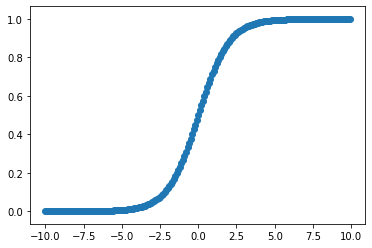

In [40]:
plt.scatter(z, sigmoid)
#plt.scatter(z, np.round(z))

In [42]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(x,y)
model.coef_, model.intercept_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(array([[ 0.69926296, -0.2826264 ]]), array([0.01964337]))

In [43]:
y_hat = np.sum(model.coef_ * x, axis=1) + model.intercept_
y_hat

array([-6.74111798, -4.6579352 ,  1.66464357, -1.90470163,  7.24414113])

In [45]:
sigmoid = 1/ (1+ np.exp(-y_hat))
sigmoid

array([0.00117993, 0.00939689, 0.84086036, 0.12957727, 0.99928616])

## 예측 LinearRegression : Y = WX + b
## 분류 LogistRegression : Y = sigmoid(WX + b)
그러므로 분류는 예측을 먼저 하고 나서 분류하는 것입니다